## 1. Importing necessary libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Adidas US Sales Datasets.csv')
df.head(10)

,Retailer,Retailer_ID,Invoice_Date,Region,State,City,Product,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200","$6,00,000","$3,00,000",50%,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000","$5,00,000","$1,50,000",30%,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000","$4,00,000","$1,40,000",35%,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,"$3,82,500","$1,33,875",35%,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,$60.00,900,"$5,40,000","$1,62,000",30%,In-store
5,Foot Locker,1185732,06-01-2020,Northeast,New York,New York,Women's Apparel,$50.00,"1,000","$5,00,000","$1,25,000",25%,In-store
6,Foot Locker,1185732,07-01-2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,250","$6,25,000","$3,12,500",50%,In-store
7,Foot Locker,1185732,08-01-2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,900,"$4,50,000","$1,35,000",30%,Outlet
8,Foot Locker,1185732,21-01-2020,Northeast,New York,New York,Women's Street Footwear,$40.00,950,"$3,80,000","$1,33,000",35%,Outlet
9,Foot Locker,1185732,22-01-2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,825,"$3,71,250","$1,29,938",35%,Outlet


## 2. Data inspection

In [2]:
df.shape
#There are 9648 rows and 13 columns

(9648, 13)

In [3]:
df.columns
#This gives us the list of columns in the  dataset

Index(['Retailer', 'Retailer_ID', 'Invoice_Date', 'Region', 'State', 'City',
       'Product', 'Price_per_Unit', 'Units_Sold', 'Total_Sales',
       'Operating_Profit', 'Operating_Margin', 'Sales_Method'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer_ID       9648 non-null   int64 
 2   Invoice_Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price_per_Unit    9648 non-null   object
 8   Units_Sold        9648 non-null   object
 9   Total_Sales       9648 non-null   object
 10  Operating_Profit  9648 non-null   object
 11  Operating_Margin  9648 non-null   object
 12  Sales_Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


## 3. Data cleaning (Data preprocessing)

In [5]:
# Ensure that the columns are of type string before trying to use string methods on them
df['Price_per_Unit'] = df['Price_per_Unit'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df['Total_Sales'] = df['Total_Sales'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df['Operating_Profit'] = df['Operating_Profit'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
df['Units_Sold'] = df['Units_Sold'].astype(str).str.replace(',', '').astype(float)
df['Operating_Margin'] = df['Operating_Margin'].astype(str).str.replace('%', '').astype(float)
df.head()

/tmp/ipykernel_66/4034482655.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Price_per_Unit'] = df['Price_per_Unit'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
/tmp/ipykernel_66/4034482655.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Total_Sales'] = df['Total_Sales'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
/tmp/ipykernel_66/4034482655.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Operating_Profit'] = df['Operating_Profit'].astype(str).str.repl

,Retailer,Retailer_ID,Invoice_Date,Region,State,City,Product,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,600000.0,300000.0,50.0,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,500000.0,150000.0,30.0,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,400000.0,140000.0,35.0,In-store
3,Foot Locker,1185732,04-01-2020,Northeast,New York,New York,Women's Athletic Footwear,45.0,850.0,382500.0,133875.0,35.0,In-store
4,Foot Locker,1185732,05-01-2020,Northeast,New York,New York,Men's Apparel,60.0,900.0,540000.0,162000.0,30.0,In-store


In [6]:
df_clean = df
df_clean['Total_Sales'] = df_clean['Price_per_Unit'] * df_clean['Units_Sold']
df_clean['Operating_Profit'] = df_clean['Total_Sales'] * df_clean['Operating_Margin']/100
df_clean.head(3)
#The columns are now corrected and stored in a new dataframe called 'df_clean'
#The total sales and operating profit doesn't  match the actual value. That is why we have created another data frame.

,Retailer,Retailer_ID,Invoice_Date,Region,State,City,Product,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method
0,Foot Locker,1185732,01-01-2020,Northeast,New York,New York,Men's Street Footwear,50.0,1200.0,60000.0,30000.0,50.0,In-store
1,Foot Locker,1185732,02-01-2020,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000.0,50000.0,15000.0,30.0,In-store
2,Foot Locker,1185732,03-01-2020,Northeast,New York,New York,Women's Street Footwear,40.0,1000.0,40000.0,14000.0,35.0,In-store


In [7]:
for column in df_clean.columns:
    if df_clean[column].dtype == 'O':
        df_clean[column] = df_clean[column].str.lower()
df_clean.head(3)
#Converting all strings to lower case to maintain consistency.

,Retailer,Retailer_ID,Invoice_Date,Region,State,City,Product,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method
0,foot locker,1185732,01-01-2020,northeast,new york,new york,men's street footwear,50.0,1200.0,60000.0,30000.0,50.0,in-store
1,foot locker,1185732,02-01-2020,northeast,new york,new york,men's athletic footwear,50.0,1000.0,50000.0,15000.0,30.0,in-store
2,foot locker,1185732,03-01-2020,northeast,new york,new york,women's street footwear,40.0,1000.0,40000.0,14000.0,35.0,in-store


In [8]:
df_clean['Invoice_Date'] = pd.to_datetime(df_clean['Invoice_Date'], format="%d-%m-%Y")
#Converting Invoice Date to datetime format
df_clean.info()
#The new dataframe has all the columns of proper data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer_ID       9648 non-null   int64         
 2   Invoice_Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price_per_Unit    9648 non-null   float64       
 8   Units_Sold        9648 non-null   float64       
 9   Total_Sales       9648 non-null   float64       
 10  Operating_Profit  9648 non-null   float64       
 11  Operating_Margin  9648 non-null   float64       
 12  Sales_Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 980.0+ KB


In [9]:
df_clean.drop_duplicates(inplace = True)
df_clean.shape
#There are No Duplicate Rows in the Dataset

(9648, 13)

In [10]:
df_clean.columns.value_counts()
#There are No Duplicate Columns in the Dataset

City                1
State               1
Retailer            1
Price_per_Unit      1
Region              1
Retailer_ID         1
Operating_Profit    1
Total_Sales         1
Invoice_Date        1
Product             1
Units_Sold          1
Operating_Margin    1
Sales_Method        1
dtype: int64

In [11]:
df_clean.isnull().sum()
#There are no null values in the data set

Retailer            0
Retailer_ID         0
Invoice_Date        0
Region              0
State               0
City                0
Product             0
Price_per_Unit      0
Units_Sold          0
Total_Sales         0
Operating_Profit    0
Operating_Margin    0
Sales_Method        0
dtype: int64

## 4. Exploratory Data Analysis

In [12]:
df_clean.describe()

,Retailer_ID,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,12455.083955,4894.793501,42.299129
std,2.636038e+04,14.705397,214.252030,12716.392111,4866.464372,9.719742
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,10.000000
25%,1.185732e+06,35.000000,106.000000,4065.250000,1753.440000,35.000000
50%,1.185732e+06,45.000000,176.000000,7803.500000,3262.980000,41.000000
75%,1.185732e+06,55.000000,350.000000,15864.500000,6192.360000,49.000000
max,1.197831e+06,110.000000,1275.000000,82500.000000,39000.000000,80.000000


In [13]:
range = ['Price_per_Unit','Units_Sold', 'Total_Sales', 'Operating_Profit', 'Operating_Margin']
for r in range:
    print("range of ", r , " : ", df_clean[r].max() - df_clean[r].min())
#The range of numerical columns are as follows

range of  Price_per_Unit  :  103.0
range of  Units_Sold  :  1275.0
range of  Total_Sales  :  82500.0
range of  Operating_Profit  :  39000.0
range of  Operating_Margin  :  70.0


### Sales Analysis

In [14]:
df_clean['Product'].value_counts().idxmax()
# The most listed product is 'men's athletic footwear'

"men's street footwear"

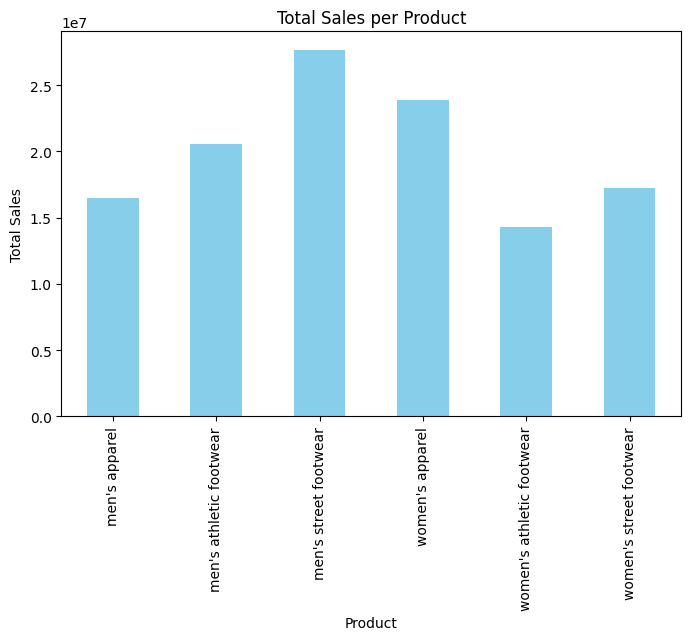

In [15]:
product_sales = df_clean.groupby('Product')['Total_Sales'].sum()

plt.figure(figsize=(8, 5))
product_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales per Product')
plt.show()
# Men's Street Footwear' has the highest total sales

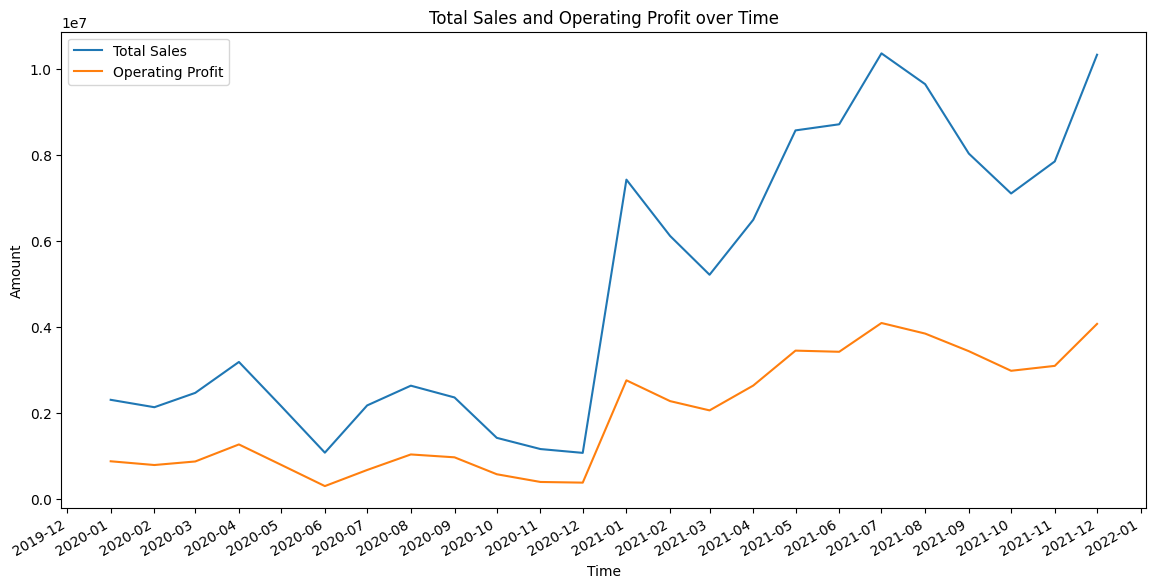

In [16]:
import matplotlib.dates as mdates

df_clean['Year'] = df_clean['Invoice_Date'].dt.year
df_clean['Month'] = df_clean['Invoice_Date'].dt.month
monthly_data = df_clean.groupby(['Year', 'Month']).agg({
    'Total_Sales': 'sum',
    'Operating_Profit': 'sum'
}).reset_index()
monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(14, 7))

plt.plot(monthly_data['Date'], monthly_data['Total_Sales'], label='Total Sales')
plt.plot(monthly_data['Date'], monthly_data['Operating_Profit'], label='Operating Profit')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate() # for the x date angle

plt.title("Total Sales and Operating Profit over Time")
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()

plt.show()
#The below graph shows trend of total sales and operating profit over time
#There is a gradual increase in total sales and operating profit over time.
#During dec 2020 to jan 2021, there is a sudden increase in total sales and operating profit but the point to note is that the extent of increase of profit is lesser than that of sales.

In [17]:
print("Total sales: ", df_clean.groupby(['Sales_Method']).Total_Sales.sum())
print("Total profit: ", df_clean.groupby(['Sales_Method']).Operating_Profit.sum())
# Out of different sales methods, 'online' has the highest total sales and profit whereas, 'in-store' has the lowest total sales and profit.

Total sales:  Sales_Method
in-store    35664375.0
online      44965657.0
outlet      39536618.0
Name: Total_Sales, dtype: float64
Total profit:  Sales_Method
in-store    12759128.75
online      19552537.72
outlet      14913301.23
Name: Operating_Profit, dtype: float64


In [18]:
df_clean.groupby(['Product'])['Units_Sold'].mean()
#The below lists the average number of units sold per product per day. That is, the average transaction per day.
# men's street footwear has the highest transaction per day whereas, men's apparel has the least.

Product
men's apparel                190.960772
men's athletic footwear      270.513043
men's street footwear        368.521739
women's apparel              269.792910
women's athletic footwear    197.531756
women's street footwear      243.948383
Name: Units_Sold, dtype: float64

In [19]:
df_clean.groupby(['Sales_Method'])['Units_Sold'].std()
#The belows lists the amount of units sold variation for each sales method
#It is clear that 'outlet' has the highest variation which means that the number of units sold every day differs a lot, while 'online' has the lowest variation

Sales_Method
in-store    203.410458
online      176.269773
outlet      232.193750
Name: Units_Sold, dtype: float64

In [20]:
df_clean.groupby(['Product'])['Total_Sales'].std()
#These values represent the spread or variability of 'Total_Sales' within each product category.
# A higher standard deviation indicates greater variability in sales within that product category.

Product
men's apparel                10783.845485
men's athletic footwear      12707.987489
men's street footwear        14978.931461
women's apparel              14199.454793
women's athletic footwear     9630.473858
women's street footwear      11196.643353
Name: Total_Sales, dtype: float64

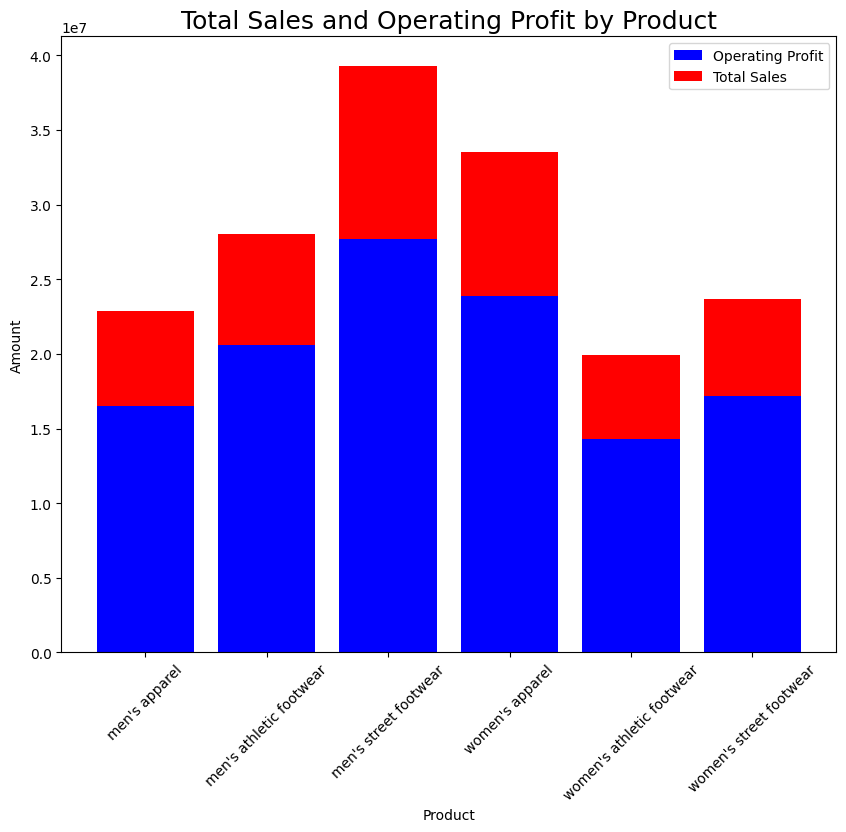

In [21]:
product_sales_profit = df_clean.groupby('Product')[['Total_Sales', 'Operating_Profit']].sum()

plt.figure(figsize=[10,8])
plt.bar(product_sales_profit.index, product_sales_profit['Total_Sales'], color='blue')
plt.bar(product_sales_profit.index, product_sales_profit['Operating_Profit'], bottom=product_sales_profit['Total_Sales'], color='red')

plt.title("Total Sales and Operating Profit by Product", fontsize=18)
plt.xlabel("Product")
plt.ylabel("Amount")
plt.legend(["Operating Profit", "Total Sales"])
plt.xticks(rotation=45)
plt.show()
#This visualization shows operating profit and total salesby product. 
#It is clear that men's street footwear has the highest total sales and operating profit.

### Profitability Analysis

In [22]:
df_clean.groupby(['Product'])['Operating_Profit'].median()
#Considering median, there is more profit in men's street footwear and least in women's athletic footwear.

Product
men's apparel                2679.415
men's athletic footwear      3293.760
men's street footwear        5201.500
women's apparel              4004.200
women's athletic footwear    2357.100
women's street footwear      2703.000
Name: Operating_Profit, dtype: float64

In [23]:
df_clean.groupby(['Product'])['Operating_Margin'].median()
#men's street footwear has the highest operating margin . And the general operating margin is 40%.

Product
men's apparel                40.0
men's athletic footwear      40.0
men's street footwear        45.0
women's apparel              44.0
women's athletic footwear    41.0
women's street footwear      40.0
Name: Operating_Margin, dtype: float64

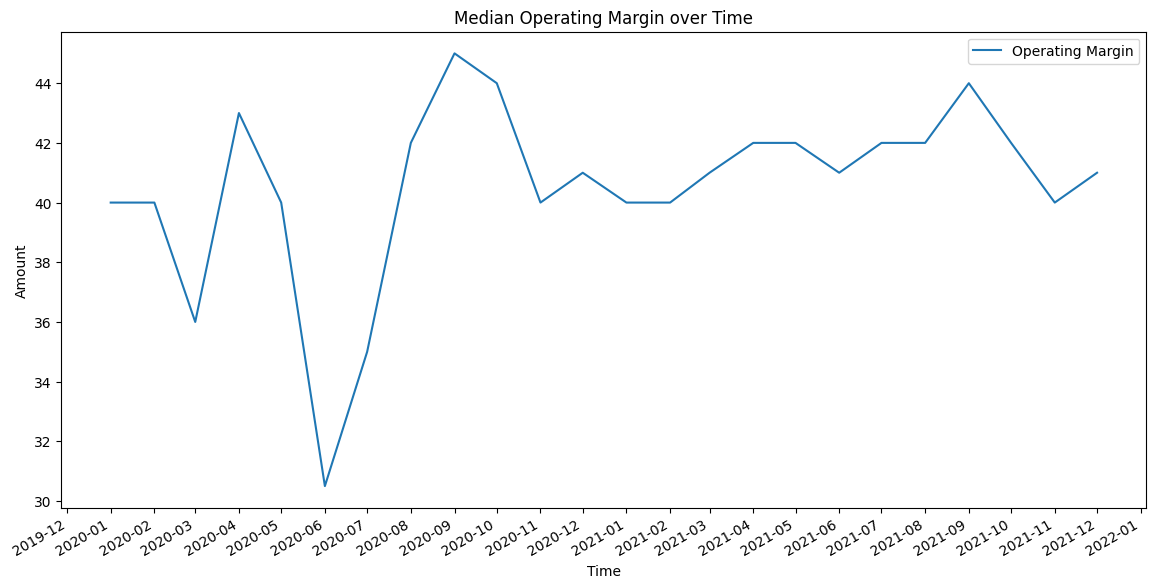

In [24]:
import matplotlib.dates as mdates

df_clean['Year'] = df_clean['Invoice_Date'].dt.year
df_clean['Month'] = df_clean['Invoice_Date'].dt.month
monthly_data = df_clean.groupby(['Year', 'Month']).agg({
    'Operating_Margin': 'median'
}).reset_index()
monthly_data['Date'] = pd.to_datetime(monthly_data[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(14, 7))
plt.plot(monthly_data['Date'], monthly_data['Operating_Margin'], label='Operating Margin')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gcf().autofmt_xdate() # for the x date angle

plt.title("Median Operating Margin over Time")
plt.xlabel('Time')
plt.ylabel('Amount')
plt.legend()

plt.show()
#The below graph shows trend of median operating margin over time.
#It is clear that the median operating margin is constantly changing over time and was the least in june 2020.
#The highest median operating margin was in sept 2020

In [25]:
# Filter the dataframe for June 2020 and sales method as online
filtered_data = df_clean[(df_clean['Year'] == 2020) & (df_clean['Month'] == 6) & (df_clean['Sales_Method'] == 'online')]

# Calculate total sales
total_sales = filtered_data['Total_Sales'].sum()
total_sales
#The total sales that happened via online in June 2020 is 223,569 units.

223569.0

In [26]:
filtered_data = df_clean[(df_clean['Year'] == 2020) & (df_clean['Month'] == 9) & (df_clean['Sales_Method'] == 'online')]

# Calculate total sales
total_sales = filtered_data['Total_Sales'].sum()
total_sales

456214.0

In [27]:
# Calculate total sales for June 2020
total_sales_June2020 = df_clean[(df_clean['Year'] == 2020) & (df_clean['Month'] == 6)]['Total_Sales'].sum()

# Calculate percentage of online sales for June 2020
percentage_online_sales_June2020 = (total_sales / total_sales_June2020) * 100
percentage_online_sales_June2020
#The percentage of sales via online in June 2020 is approximately 20.62%.

42.078631683997514

In [28]:
total_sales_June2020 = df_clean[(df_clean['Year'] == 2020) & (df_clean['Month'] == 9)]['Total_Sales'].sum()

# Calculate percentage of online sales for Sept 2020
percentage_online_sales_June2020 = (total_sales / total_sales_June2020) * 100
percentage_online_sales_June2020

19.268348928025084

In [29]:
print("Kurtosis : ", df_clean['Operating_Profit'].kurt())
print("Skewness : ", df_clean['Operating_Profit'].skew())
#The positive kurtosis suggests that the distribution has heavier tails and a sharper peak compared to a normal distribution.
#The positive skewness suggests that the distribution is right-skewed, meaning it is stretched more to the right.

Kurtosis :  7.181164174449948
Skewness :  2.334590765903441


In [30]:
df_clean.groupby(['Sales_Method'])['Operating_Margin'].skew()
#The operating margin for each sales method is right skewed or positively skewed. And in-store has the highest skewness whereas, outlet has the lowest skewness.
#This means that the right tail is longer and fatter than the left tail.

Sales_Method
in-store    0.363159
online      0.251876
outlet      0.148255
Name: Operating_Margin, dtype: float64

### Regional Analysis

In [31]:
print("Region wise: ",df_clean.groupby(['Region'])['Total_Sales'].sum())
print("State wise: ", df_clean.groupby(['State'])['Total_Sales'].sum().idxmax())
print("City wise: ", df_clean.groupby(['City'])['Total_Sales'].sum().idxmax())
#In general the western region has highest sales. The State with highest sales is New York.

Region wise:  Region
midwest      16674434.0
northeast    25078267.0
south        20603356.0
southeast    21374436.0
west         36436157.0
Name: Total_Sales, dtype: float64
State wise:  new york
City wise:  new york


In [32]:
print(df_clean.groupby(['Region'])['Product'].value_counts().idxmax())
print(df_clean.groupby(['State'])['Product'].value_counts().idxmax())
print(df_clean.groupby(['City'])['Product'].value_counts().idxmax())
#The following gives the overall most popular Product in each of region, state and city division.
#men's apparel is the most popular , city and state wise but on a bigger picture, men's athletic footwear is the most popular product in western region.
#Note: Here popularity is taken as the number of times a particular product is listed and not number of products sold.

('west', "men's athletic footwear")
('california', "men's apparel")
('portland', "men's apparel")


In [33]:
print("Region wise: ", df_clean.groupby(['Region', 'Product'])['Units_Sold'].sum().idxmax())
print("State wise: ", df_clean.groupby(['State', 'Product'])['Units_Sold'].sum().idxmax())
print("City wise: ", df_clean.groupby(['City', 'Product'])['Units_Sold'].sum().idxmax())
#specific regional, state, city preferences for certain products are listed below. In each of them, men's street footwear is more preferred.

Region wise:  ('west', "men's street footwear")
State wise:  ('new york', "men's street footwear")
City wise:  ('charleston', "men's street footwear")


In [34]:
df_clean.groupby(['Region', 'Sales_Method'])['Operating_Profit'].sum()
#This tells us the best sales method for each region for max profit.

Region     Sales_Method
midwest    in-store        2316565.00
           online          3133263.98
           outlet          1410116.25
northeast  in-store        4254420.00
           online          2246831.65
           outlet          3231522.25
south      in-store         134800.00
           online          4149888.22
           outlet          4936917.10
southeast  in-store        2558256.25
           online          5080401.63
           outlet           754401.32
west       in-store        3495087.50
           online          4942152.24
           outlet          4580344.31
Name: Operating_Profit, dtype: float64

### Retailer Analysis

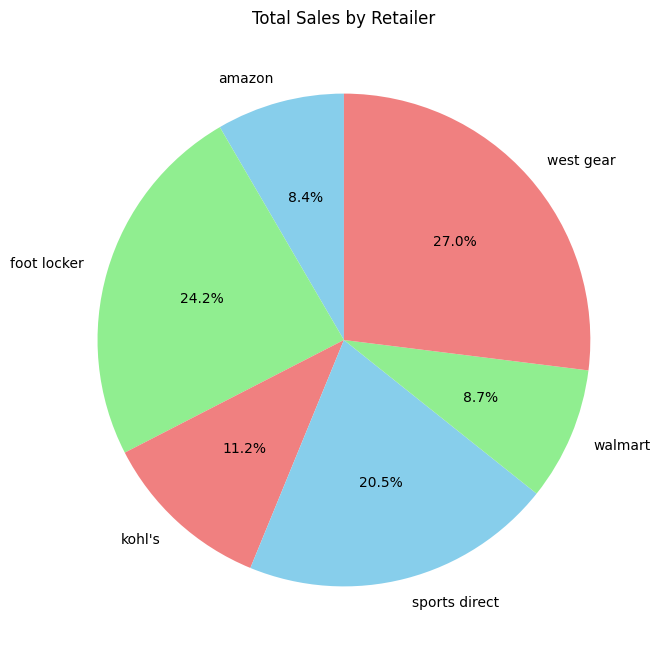

In [35]:
sales_by_location = df_clean.groupby('Retailer')['Total_Sales'].sum()

# Plotting a pie chart for total sales by retailer
plt.figure(figsize=(8, 8))
sales_by_location.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Total Sales by Retailer')
plt.ylabel('')
plt.show()
#The total sales is highest by the retailer - west gear followed by foot locker. 
#Even though online mode has the highest sales, amazon has the least total sales.

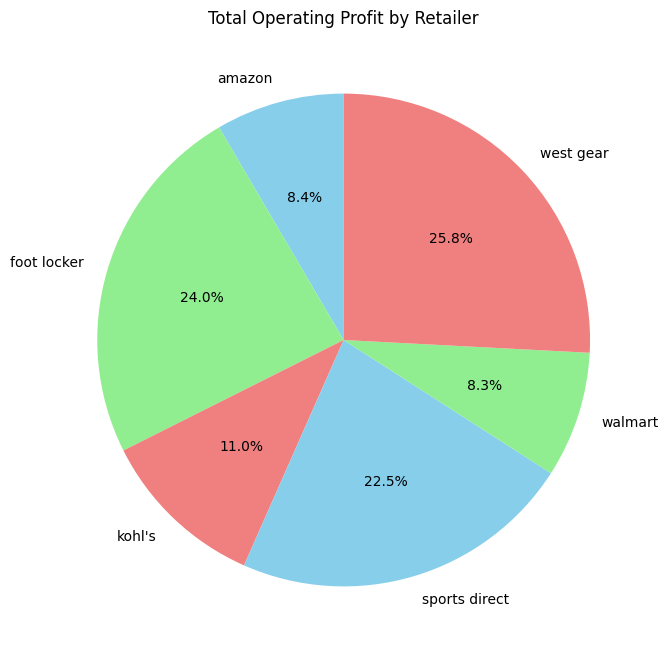

In [36]:
sales_by_location = df_clean.groupby('Retailer')['Operating_Profit'].sum()

# Plotting a pie chart for operating profit by retailer
plt.figure(figsize=(8, 8))
sales_by_location.plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral'])
plt.title('Total Operating Profit by Retailer')
plt.ylabel('')
plt.show()
#The operating profit is highest by the retailer - west gear followed by foot locker. 
#Even though online mode has the highest operating profit, amazon has the least operating profit.

In [37]:
df_clean.groupby(['Retailer', 'Sales_Method'])['Operating_Profit'].mean()
# The below lists the average operating profit by each retailer.
#Even though west gear had the highest total operating profit, walmart outperformed them in terms of average operational profits.
# Even though online mode had the overall highest operating profit, considering each retailer's sales method, in-store had the highest operating profit.

Retailer       Sales_Method
amazon         in-store         7083.972458
               online           3773.055296
               outlet           3818.121821
foot locker    in-store         6256.570156
               online           3717.388738
               outlet           4189.243405
kohl's         in-store         7359.071181
               online           3831.638194
               outlet           6179.129774
sports direct  in-store         7035.712457
               online           4542.114372
               outlet           5457.985430
walmart        in-store        13325.337838
               online           4781.102743
               outlet           6753.334784
west gear      in-store         7868.115165
               online           3859.311032
               outlet           4260.573448
Name: Operating_Profit, dtype: float64

In [38]:
df_clean.groupby('Retailer')['Product'].value_counts()
#The below lists the most popular products sold by each retailer. This gives us an idea about how each retailer is making more profits through their products.

Retailer       Product                  
amazon         men's athletic footwear      159
               men's street footwear        159
               women's apparel              159
               women's athletic footwear    158
               men's apparel                157
               women's street footwear      157
foot locker    men's street footwear        449
               men's athletic footwear      442
               women's athletic footwear    442
               women's street footwear      438
               men's apparel                433
               women's apparel              433
kohl's         men's athletic footwear      172
               men's street footwear        172
               women's apparel              172
               women's street footwear      172
               men's apparel                171
               women's athletic footwear    171
sports direct  women's street footwear      342
               women's apparel              341

### Pricing Analysis

In [39]:
df_clean[['Price_per_Unit','Units_Sold', 'Total_Sales', 'Operating_Profit', 'Operating_Margin']].corr()
# If Price per unit is more, the total sales & operating profit will be more since they are positively correlated.
# Whereas, price per unit and operating margin has negative weak correaltion.
# Price per unit and units sold are positively weakly correlated. This wouldn't guarantee that more price per unit would mean more units sold to some extent.
# units sold and operating profit have positive strong correlation which is by logic correct and same with units sold and total sales.
# Interestingly, operating margin and units sold are negatively moderately correlated.
# As operating margin and unit sold is negatively moderately correlated, so we can say that the most sales/more units would be sold due to excess money spent on ads and hence we could justify that maybe the sales are high but the profit margin is comparitively less.

,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin
Price_per_Unit,1.000000,0.265869,0.539547,0.503683,-0.137486
Units_Sold,0.265869,1.000000,0.919339,0.871993,-0.305479
Total_Sales,0.539547,0.919339,1.000000,0.935372,-0.302295
Operating_Profit,0.503683,0.871993,0.935372,1.000000,-0.047491
Operating_Margin,-0.137486,-0.305479,-0.302295,-0.047491,1.000000


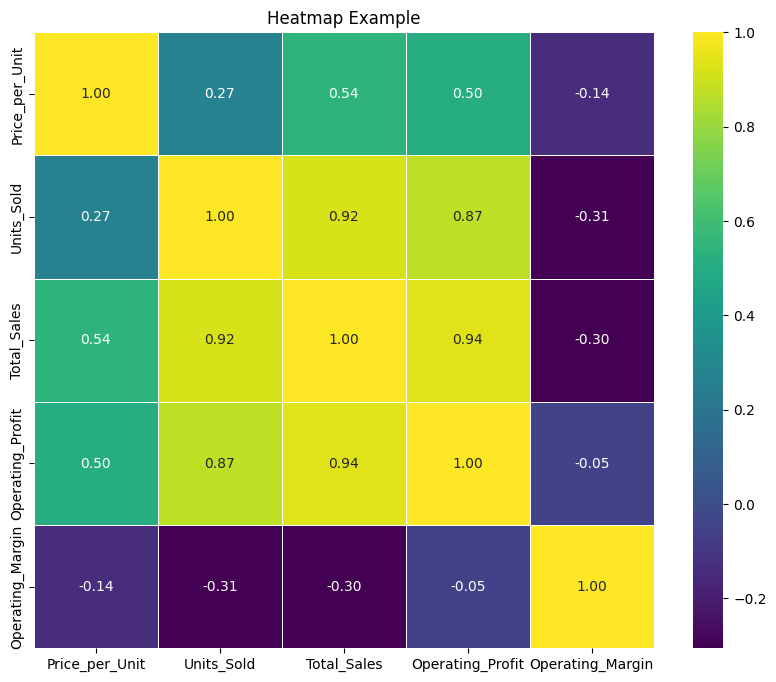

In [40]:
heatmap = df_clean[['Price_per_Unit','Units_Sold', 'Total_Sales', 'Operating_Profit', 'Operating_Margin']]
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap.corr(), cmap='viridis', annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap')
plt.show()

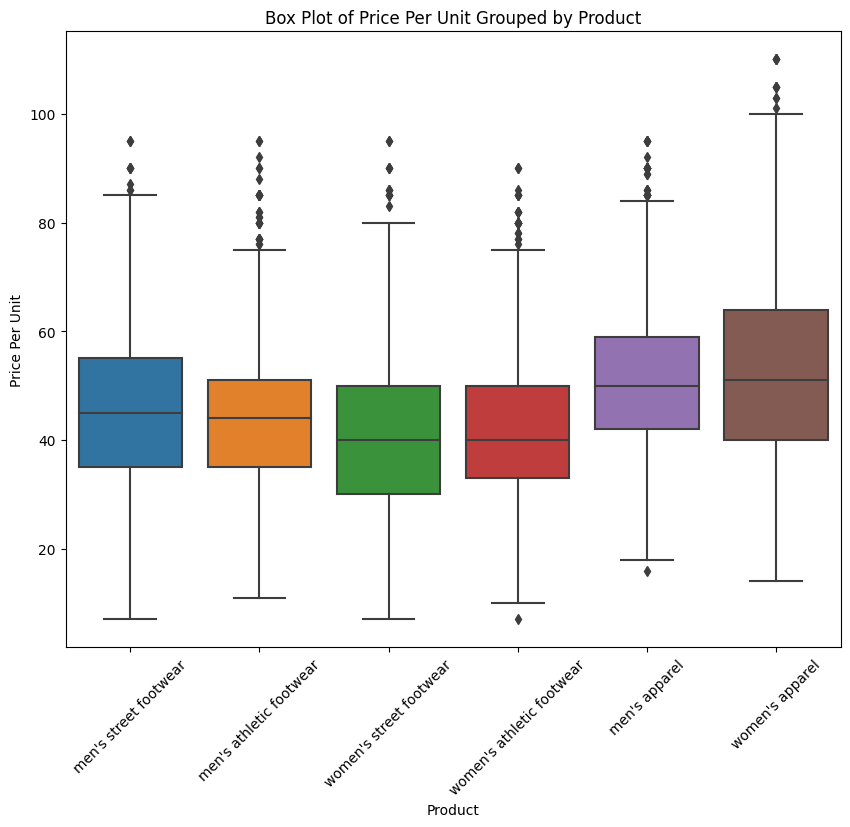

In [41]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Product', y='Price_per_Unit', data=df_clean)
plt.title('Box Plot of Price Per Unit Grouped by Product')
plt.xlabel('Product')
plt.ylabel('Price Per Unit')
plt.xticks(rotation=45)
plt.show()
#Generally, price per unit for each product has normal distribution but for "men's athletic footwear" it is slightly left skewed
# and for "women's athletic footwear" it is slightly right skewed.

#The median price per unit for "men's apparel" and "women's apparel" is the highest.
#"women's street footwear" and "women's athletic footwear" has the lowest median price per unit.
#There are many outliers towards the right side of the graph for each product.

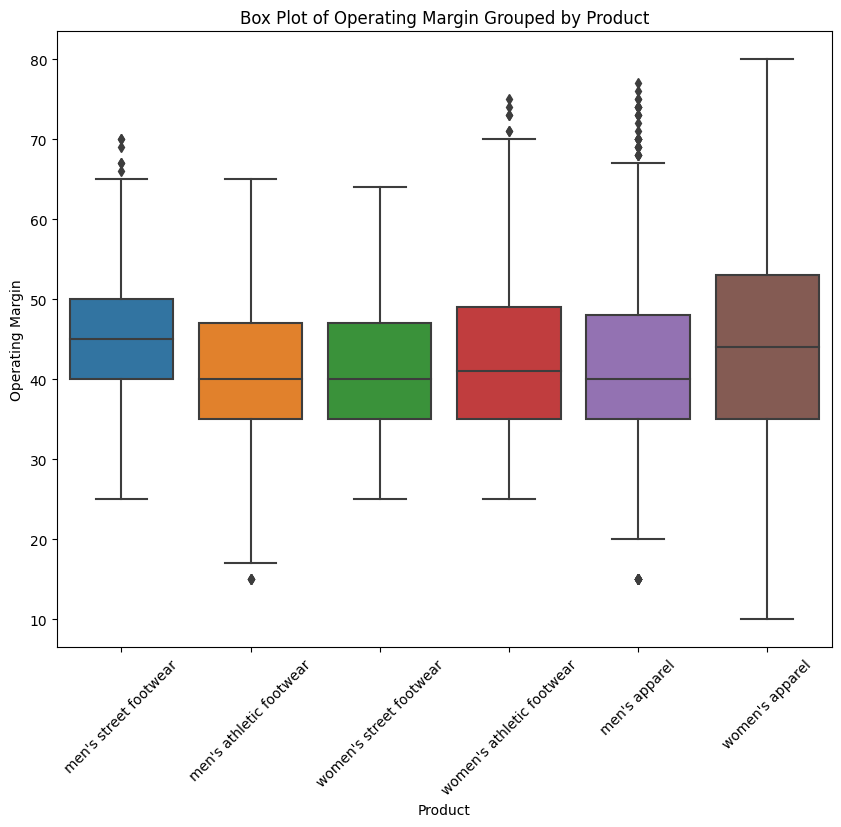

In [42]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Product', y='Operating_Margin', data=df_clean)
plt.title('Box Plot of Operating Margin Grouped by Product')
plt.xlabel('Product')
plt.ylabel('Operating Margin')
plt.xticks(rotation=45)
plt.show()
#In general, the operating margin for each product has slight right skewness, 
# but for "men's street footwear" and "women's apparel" it is normal distributed.

In [47]:
final_table = df_clean.groupby(['Region', 'State', 'City','Sales_Method','Product']).Operating_Profit.median()
final_table = final_table.sort_values(ascending=False)
final_table.to_csv('Final_Profit_dataset.csv')
#This creates a new csv file which groups region, state, city, sales method and product based on median operating profits which helps the company make better decisions while investing to gain maximum profits.